#Apresentação

O [Terrier](http://terrier.org/) é uma ferramenta open source de Recuperação de Informações desenvolvida pela Universidade de Glasgow. Além das funcionalidades básicas de indexação e consulta, o Terrier implementa várias técnicas do estado da arte de melhoria de desempenho. Nessa disciplina, iremos usar o PyTerrier, uma API em Python para o Terrier.
Documentação em https://pyterrier.readthedocs.io/_/downloads/en/latest/pdf/


As alternativas para reescrita de consultas estão em https://github.com/terrier-org/pyterrier/blob/master/docs/rewrite.rst

## Instalação do PyTerrier


In [ ]:
!pip install python-terrier
#!pip install --upgrade git+https://github.com/terrier-org/pyterrier.git#egg=python-terrier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.4/347.4 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.p

## Init

É necessário executar `pt.init()` para poder usar as funções do PyTerrier

Argumentos Opcionais:    
 - `version` - terrier IR version e.g. "5.2"    
 - `mem` - megabytes allocated to java e.g. "4096"      
 - `packages` - external java packages for Terrier to load e.g. ["org.terrier:terrier.prf"]
 - `logging` - logging level for Terrier. Defaults to "WARN", use "INFO" or "DEBUG" for more output.


In [ ]:
import pyterrier as pt
if not pt.started():
  #pt.init()
  pt.init(boot_packages=["com.github.terrierteam:terrier-prf:-SNAPSHOT"]) #necessário para o RM3

terrier-assemblies 5.9 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.8 jar not found, downloading to /root/.pyterrier...
Done
terrier-prf -SNAPSHOT jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.10.1 has loaded Terrier 5.9 (built by craigm on 2024-05-02 17:40) and terrier-helper 0.0.8



#Coleção de teste

Iremos utilizar a coleção de documentos Glasgow Herald que possui todas as notícias desse jornal no ano de 1995. Os documentos estão no formato TREC armazenados em arquivos em texto puro. São 311 arquivos que ocupam 150 MBytes. Cada arquivo refere-se a um dia do jornal e contém vários documentos (cada notícia é um documento). Há um total de 56.472 documentos/notícias na coleção. Os nomes dos arquivos indicam o ano, mês e dia da edição do jornal. Os arquivos possuem a extensão `sgml` que é uma linguagem de marcação que utiliza tags para indicar as diferentes seções dos documentos.

Você pode baixar os arquivos deste [link](https://www.inf.ufrgs.br/~viviane/DS/GH95.zip)

Exemplo de um documento:


```
<DOC>
<DOCNO>GH950114-000049</DOCNO>
<DOCID>GH950114-000049</DOCID>
<DATE>950114</DATE>
<HEADLINE>Argos sales power ahead</HEADLINE>
<EDITION>3</EDITION>
<PAGE>21</PAGE>
<RECORDNO>980369555</RECORDNO>
<TEXT>
ARGOS, which is breaking new ground with involvement in the power generators'
privatisation share sale, yesterday revealed a healthy sales boost in the
run-up to Christmas. The catalogue-shopping chain said pre-Christmas trading
had been 17% better than in 1993, while there had been a steady growth of 6% in
sales during the whole of last year on a comparable basis. An increase in store
openings led to overall sales 13% above the \#1100m worth of turnover achieved
in 1993. Chairman David Donne said: ''This strong performance reflects our
strategy of providing the consumer with a wide range of competitively priced
merchandise, supported with more catalogues and a successful advertising and
promotions programme.'' Argos, which has been chosen as a share shop for the
PowerGen and National Power share offer, will be announcing its results for
1994 on Monday, March 20.
</TEXT>
</DOC>


In [ ]:
!pip install wget

In [ ]:
!wget -q -O GH95.zip https://www.inf.ufrgs.br/~viviane/DS/GH95.zip
!mkdir GH95
!unzip -q GH95.zip -d GH95

In [ ]:
#coleção Glasgow Herald
files = pt.io.find_files("/content/GH95/docs")


# Indexação com o PyTerrier

Mais exemplos em (https://github.com/terrier-org/pyterrier).



## Indexando arquivos no formato TREC

Iremos indexar a coleção do jornal Glasgow Herald com notícias pulicadas em 1995.
Para indexar arquivos TXT, PDF, Microsoft Word, deve-se usar pt.FilesIndexer em vez de pt.TRECCollectionIndexer

Criar o objeto `pt.TRECCollectionIndexer`     
INDEX_DIR especifica aonde salvar o índice


In [ ]:
INDEX_DIR='/content/drive/MyDrive/Colab Notebooks/GH95' #diretório aonde o índice vai ficar
indexer = pt.TRECCollectionIndexer(INDEX_DIR,
    # vamos salvar o texto como metadados
    meta= {'docno' : 26, 'text' : 2048},
    # The tags from which to save the text. ELSE is special tag name, which means anything not consumed by other tags.
    meta_tags = {'text' : 'ELSE'},
    verbose=True,
    overwrite=True) #para sobrescrever, caso já tenha um índice com aquele nome
indexref = indexer.index(files)
#Indexando os arquivos -- chamando o método index no objeto TRECCollectionIndexer
index = pt.IndexFactory.of(indexref)

  0%|          | 0/311 [00:00<?, ?files/s]

Por default, o PyTerrier aplica stemming (Porter) e remoção de stopwords (tudo para inglês). Podemos não fazer stemming (`stemmer=None`) ou fazer stemming para outro idioma  (`stemmer='portugese'` -- sim, está escrito errado) e também manter as stopwords (`stopwords=None`).


##Inspecionando o índice:

IndexRef representa um objeto [IndexRef](http://terrier.org/docs/current/javadoc/org/terrier/querying/IndexRef.html). Pode ser visto como um ponteiro ou URI que aponta para o local do arquivo de índice.

In [ ]:
indexref.toString()

'/content/drive/MyDrive/Colab Notebooks/GH95/data.properties'

`index.getCollectionStatistics().toString()` fornece informações sobre o índice tais como o número de documentos indexados e o número de termos distintos.

In [ ]:
index = pt.IndexFactory.of(indexref)
print(index.getCollectionStatistics().toString())

Number of documents: 56472
Number of terms: 119803
Number of postings: 9085575
Number of fields: 0
Number of tokens: 13233703
Field names: []
Positions:   false



In [ ]:
# Se necessário, podemos imprimir todo o vocabulário para ver os termos indexados
#for kv in index.getLexicon():
 # print("%s (%s) -> %s (%s)" % (kv.getKey(), type(kv.getKey()), kv.getValue().toString(), type(kv.getValue()) ) )

##Consultas em Lote

Para avaliar a qualidade de um sistema de IR, é necessário rodar um número significativo de consultas (i.e., pelo menos 30) e calcular as métricas de avalição para as mesmas. As consultas utilizadas em campanhas de avaliação são comumente chamadas de **tópicos**. Um tópico é representado por uma estrutura que possui um número de identificação, um título, uma descrição e uma narrativa. O título é uma descrição bastante sucinta do tópico. A descrição fornece um pouco mais de detalhe e a narrativa auxilia as pessoas que produzem os julgamentos de relevância a distinguir documentos relevantes de não relevantes.
A seguir, apresentamos um exemplo de tópico:



```
<top>
<num> 254 </num>
<title> Earthquake Damage <title>
<desc> Find documents describing damage to property or persons caused by an earthquake and specifying the area affected. <desc>
<narr> Relevant documents will provide details on damage to buildings and material goods or injuries to people as a result of an earthquake. The geographical location (e.g. country, region, city) affected by the earthquake must also be mentioned. <narr>
</top>

```


In [ ]:
#arquivo com os tópicos de consulta
topicsFile = '/content/GH95/tops_qrels/topicos05.txt'
topics = pt.io.read_topics(topicsFile)
print(topics)

    qid                                    query
0   251                     alternative medicine
1   252                pension schemes in europe
2   253             countries with death penalty
3   254                        earthquake damage
4   255                         internet junkies
5   256                creutzfeldt jakob disease
6   257          ethnic cleansing in the balkans
7   258                       brain drain impact
8   259                              golden bear
9   260                 anti smoking legislation
10  261                          fortune telling
11  262                         benefit concerts
12  263             football refereeing disputes
13  264        smuggling of radioactive material
14  265                  deutsche bank takeovers
15  266  discrimination against european gypsies
16  267              best foreign language films
17  268                 human cloning and ethics
18  269                      treaty ratification
19  270             

#Avaliando o resultado das consultas
Para avaliar quão bem o sistema de IR respondeu as consultas, é necessário conhecer as respostas “esperadas”, conhecidas como julgamentos de relevância. A lista de documentos que deveriam ter sido recuperados para o conjunto de consultas do arquivo topicos.txt está no arquivo **qrels_GH05.txt**. Um pequeno trecho deste arquivo é ilustrado abaixo. O trecho mostra documentos que foram avaliados para o tópico de consulta 251. O documento GH950126-000087 foi considerado relevante para esta consulta (o que é indicado pelo número 1 na última coluna).

```

251 0 GH950107-000074 0
251 0 GH950114-000076 0
251 0 GH950124-000109 0
251 0 GH950126-000087 1
251 0 GH950202-000076 0
251 0 GH950206-000123 0
251 0 GH950208-000060 0


In [ ]:
#arquivo com os julgamentos de relevância
qrelsFile = '/content/GH95/tops_qrels/qrels_GH05.txt'
qrels = pt.io.read_qrels(qrelsFile)

##Métricas de avaliação
Conforme vimos em aula, há diversas métricas para avaliar a qualidade do resultado de um sistema de RI. A Mean Average Precision (MAP) é uma das mais importantes. Adicionalmente, também podemos olhar para a precisão em diversos pontos do ranking como a P@1, P@10, etc.
Para listar as métricas implementadas use `ir_measures.parse_trec_measure('official') `

In [ ]:
from pyterrier.measures import *
#ir_measures.parse_trec_measure('official')

# Reescrita de consultas

Há diversas formas de reescrita de consultas com o objetivo de melhorar a qualidade da recuperação.
Iremos testar 3 métodos


*   RM3
*   Bo1
*   KL

Esses métodos estão explicados em https://github.com/terrier-org/pyterrier/blob/master/docs/rewrite.rst e foram utilizados nesse artigo:

Pal, Dipasree, Mandar Mitra, and Kalyankumar Datta. "Query expansion using term distribution and term association." arXiv preprint arXiv:1303.0667 (2013) https://arxiv.org/pdf/1303.0667

In [ ]:
#baseline run com o BM25
bm25 = pt.BatchRetrieve(index, wmodel="BM25")


##RM3

Fontes:


*   Lavrenko, Victor, and W. Bruce Croft. "Relevance-based language models." ACM SIGIR Forum. Vol. 51. No. 2. New York, NY, USA: ACM, 2017. https://doi.org/10.1145/3130348.3130376
*   Kranthi Kode, Search Deep Dive - Query Expansion https://kode-r.medium.com/search-deep-dive-query-expansion-f30183c2a564



Os modelos de linguagem estatísticos tentam capturar a essência de uma linguagem observando exemplos de texto. Dada uma sequência de palavras, os modelos de linguagem fornecem uma estimativa sobre a probabilidade de formar uma (sub)frase válida usando essa sequência. Vários esquemas baseados em modelos de linguagem (chamados de ***Relevance Models*** ou RMs) também foram propostos para recuperação de informações. Eles são eficazes na identificação de palavras que podem ser usadas na expansão de consultas a partir de documentos. O esquema mais popular entre eles é conhecido como RM3. Nos esquemas RM, construímos um modelo de linguagem utilizando o texto de documentos relevantes. A ideia é usar o modelo de linguagem para calcular a probabilidade de ocorrência de cada palavra candidata a expansão e escolher as mais prováveis.
Os documentos relevantes não são todos tratados da mesma forma.
Eles são avaliados com base em sua similaridade com a consulta original, conforme determinado por uma medida chamada query likelihood model p(Q|D_i)

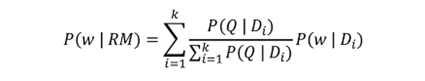

D_i é o i-ésimo documento do ranking.
Para criar o query likelihood model, iremos usar um modelo de unigramas por simplicidade.
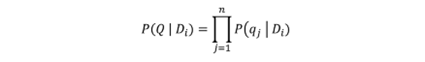

P(q_j|D_i) é a probabilidade de ocorrência da j-ésima palavra da consulta no i-esimo documento do ranking. No modelo unigrama, essa probabilidade é igual ao número de vezes que aquela palavra apareceu no documento dividido pelo número total de palavras do documento, conforme estimativa de máxima verossimilhança.

Se uma palavra da consulta não estiver no documento, ou seja, P(q_j|D_i) = 0 para qualquer palavra, P(Q|D_i) também se tornará 0. Para evitar isso, atribuímos alguma probabilidade até mesmo às palavras que não aparecem no documento. Isso é chamado de smoothing e a estratégia mais popular é conhecida como Dirichlet smoothing. Nesta abordagem, em vez de usar apenas a contagem de palavras do documento, usamos também o número de vezes que a palavra aparece em todo o corpus. Ambas as contagens são combinadas utilizando pesos adequados.

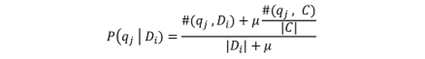

O peso μ varia de 1.000 a 2.000. P(w | D_i) também segue o mesmo padrão.

Agora podemos obter as probabilidades de classificar as palavras candidatas à expansão, substituindo-as em P(w | RM). Esta é a primeira versão de modelos de relevância, denominada RM1. Se considerarmos também a “relevância” entre as palavras candidatas à expansão e a consulta original, obteremos melhores resultados. Adicionar RM1 e o modelo de consulta original em uma combinação linear é chamado de RM3.

eq4.png


In [ ]:
#reescrita da consulta com o RM3
rm3_pipe = bm25 >> pt.rewrite.RM3(index) >> bm25


##Bo1

Com base na estatísticas de [Bose-Einstein](https://en.wikipedia.org/wiki/Bose%E2%80%93Einstein_statistics), a informatividade de um termo *t* é medida pela divergência entre a sua distribuição nos documentos mais bem ranqueados e uma distribuição aleatória.

In [ ]:
#reescrita da consulta com o Bo1
bo1 = pt.rewrite.Bo1QueryExpansion(index)
dph = pt.BatchRetrieve(index, wmodel="DPH") #explicação do DPH http://terrier.org/docs/current/javadoc/org/terrier/matching/models/DPH.html
pipelineQE = dph >> bo1 >> dph

In [ ]:
#examinando as palavras adicionadas
pipelineDisplay = dph >> bo1
pipelineDisplay.search("alternative medicine")

,qid,query_0,query
0,1,alternative medicine,applypipeline:off altern^1.290054714 medicin^1...


##KL

Este método utiliza a divergência de [Kullback-Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) (KL) entre as
distribuições de probabilidade dos termos nos documentos relevantes (ou pseudo-relevantes) e no corpus completo.

In [ ]:
#reescrita de consultas com KL
kl = pt.rewrite.KLQueryExpansion(index)
kl_pipe = bm25 >> kl >> bm25

##Experimento Comparativo

In [ ]:
df_res = pt.Experiment([bm25, rm3_pipe, dph, kl_pipe],
            topics,
            qrels,
            eval_metrics=["map"],
            round=4, baseline=0,
            )

In [ ]:
# renomear colunas
df_res.at[0,'name']='BM25'
df_res.at[1,'name']='RM3'
df_res.at[2,'name']='Bo1'
df_res.at[3,'name']='KL'


In [ ]:
df_res

,name,map,map +,map -,map p-value
0,BM25,0.3522,NaN,NaN,NaN
1,RM3,0.3812,29.0,15.0,0.006417
2,Bo1,0.3520,27.0,19.0,0.987818
3,KL,0.3598,28.0,18.0,0.638019


In [ ]:
df_res = pt.Experiment([bm25, rm3_pipe, dph, kl_pipe], topics, qrels, eval_metrics=[IPrec@0.0,IPrec@0.1,IPrec@0.2,IPrec@0.3,IPrec@0.4,IPrec@0.5,IPrec@0.6,IPrec@0.7,IPrec@0.8,IPrec@0.9,IPrec@1.0], round=4)

In [ ]:
df_res

,name,IPrec@0.0,IPrec@0.1,IPrec@0.2,IPrec@0.3,IPrec@0.4,IPrec@0.5,IPrec@0.6,IPrec@0.7,IPrec@0.8,IPrec@0.9,IPrec@1.0
0,BM25,0.6200,0.5715,0.5206,0.4570,0.3897,0.3753,0.2983,0.2635,0.2220,0.1765,0.1459
1,RM3,0.6135,0.5836,0.5458,0.4931,0.4202,0.3989,0.3392,0.3113,0.2768,0.2066,0.1749
2,DPH,0.6308,0.5773,0.5121,0.4607,0.3955,0.3679,0.3143,0.2750,0.2257,0.1646,0.1209
3,KL,0.6005,0.5600,0.5160,0.4605,0.4068,0.3803,0.3195,0.2946,0.2507,0.1962,0.1588


In [ ]:
# renomear colunas
df_res.at[0,'name']='BM25'
df_res.at[1,'name']='RM3'
df_res.at[2,'name']='Bo1'
df_res.at[3,'name']='KL'


In [ ]:
df_res

,name,IPrec@0.0,IPrec@0.1,IPrec@0.2,IPrec@0.3,IPrec@0.4,IPrec@0.5,IPrec@0.6,IPrec@0.7,IPrec@0.8,IPrec@0.9,IPrec@1.0
0,BM25,0.6200,0.5715,0.5206,0.4570,0.3897,0.3753,0.2983,0.2635,0.2220,0.1765,0.1459
1,RM3,0.6135,0.5836,0.5458,0.4931,0.4202,0.3989,0.3392,0.3113,0.2768,0.2066,0.1749
2,Bo1,0.6308,0.5773,0.5121,0.4607,0.3955,0.3679,0.3143,0.2750,0.2257,0.1646,0.1209
3,KL,0.6005,0.5600,0.5160,0.4605,0.4068,0.3803,0.3195,0.2946,0.2507,0.1962,0.1588


In [ ]:
df_res = df_res.set_index('name') #mudando o índice para a coluna nome
df_res = df_res.T #transpondo o df

In [ ]:
import matplotlib.pyplot as plt

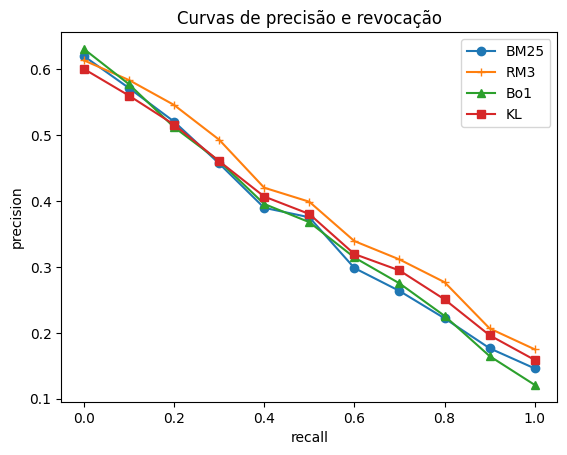

In [ ]:
#criando o plot com as curvas
x=[0, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

plt.plot(x,df_res['BM25'],marker='o')
plt.plot(x,df_res['RM3'],marker='+')
plt.plot(x,df_res['Bo1'],marker='^')
plt.plot(x,df_res['KL'],marker='s')
#plt.plot(x,df_res['DFRee'],marker='v')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title("Curvas de precisão e revocação")
plt.legend(df_res.columns)
plt.show()
#df_res.plot(kind='line')
